In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('/content/data_limpia_clase9.csv')
data.head()
data = data.drop(columns='Unnamed: 0')
data.head()
data.to_csv('data_temp_limpia.csv', index=False)

In [11]:
y = data['temperatura']
X = data.drop(columns='temperatura')

In [12]:
X.head()

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia_binarizada,Cold,Normal,Warm
0,0.92,11.27,130.0,8.05,1021.60,0,1,0,0
1,0.73,20.93,330.0,16.10,1017.00,1,0,0,1
2,0.97,5.97,193.0,14.91,1013.99,1,0,1,0
3,0.82,3.22,300.0,16.10,1031.59,1,1,0,0
4,0.60,10.88,116.0,9.98,1020.88,1,1,0,0


In [20]:
# Queremos reconstruir en una unica columna numerica donde ponga 0 si descripcion es cold, 1 si es normal, 2 si es warm
X['descripcion_n'] = None
X.head()
mascara_frio = X['Cold'] == 1
X.loc[mascara_frio,'descripcion_n'] = 0
mascara_normal = X['Normal'] == 1
X.loc[mascara_normal,'descripcion_n'] = 1
mascara = X['Warm'] == 1
X.loc[mascara,'descripcion_n'] = 2
X.head()
X_limpia = X.drop(columns= ['Cold','Normal','Warm'])
X_limpia.head()

,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia_binarizada,descripcion_n
0,0.92,11.27,130.0,8.05,1021.60,0,0
1,0.73,20.93,330.0,16.10,1017.00,1,2
2,0.97,5.97,193.0,14.91,1013.99,1,1
3,0.82,3.22,300.0,16.10,1031.59,1,0
4,0.60,10.88,116.0,9.98,1020.88,1,0


In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


def regresion(X,y,columna):
  X = X[columna]
  x_train, x_test, y_train, y_test = train_test_split(X,y)
  x_train_o = x_train.copy()
  x_test_o = x_test.copy()
  if len(x_train.shape) == 1: # Esto es por si se recibe una sola columna en el x para que no haya problemas de formato
    x_train = x_train.to_numpy()
    x_train = np.matrix(x_train.reshape(len(x_train),1))
    x_test = x_test.to_numpy()
    x_test = np.matrix(x_test.reshape(len(x_test),1))
  modelo = LinearRegression(fit_intercept=True)
  modelo.fit(x_train,y_train)
  print (f'Hola, vamos a analizar la columna {columna}')
  print (f'Para la columna {columna} el coeficiente de regresion lineal dio {modelo.coef_[0]}')
  print (f'La ordenada al origen dio: {modelo.intercept_}')
  # Vamos a graficar!
  
  plt.figure(figsize = (10,10))
  plt.scatter(x_test_o, y_test, color = 'b', label = 'Datos de testeo')
  y_pred = modelo.predict(x_test)
  plt.scatter(x_test_o, y_pred, color = 'g', label = 'Datos predichos')
  plt.legend()
  plt.show()
  r2 = r2_score(y_test,y_pred)
  print (f'El R cuadrado para este ajuste dio: {r2}')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Hola, vamos a analizar la columna humedad
Para la columna humedad el coeficiente de regresion lineal dio -30.363433026736047
La ordenada al origen dio: 34.17937250453765


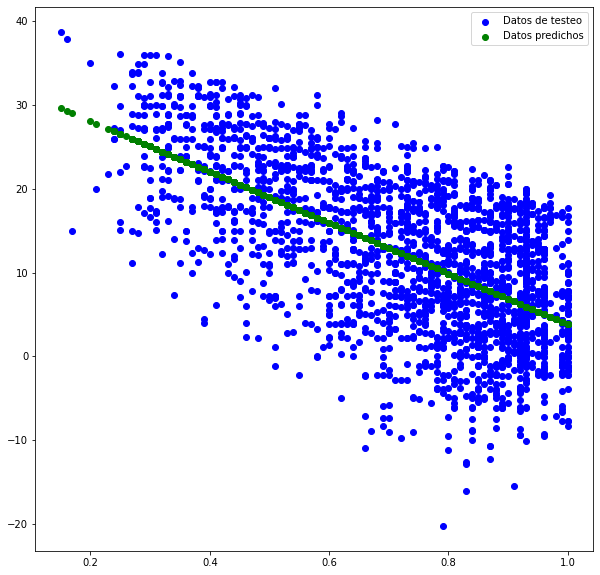

El R cuadrado para este ajuste dio: 0.4152123060951045
Hola, vamos a analizar la columna velocidad_viento_kmh
Para la columna velocidad_viento_kmh el coeficiente de regresion lineal dio 0.0032124337196874717
La ordenada al origen dio: 11.876153944025331


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


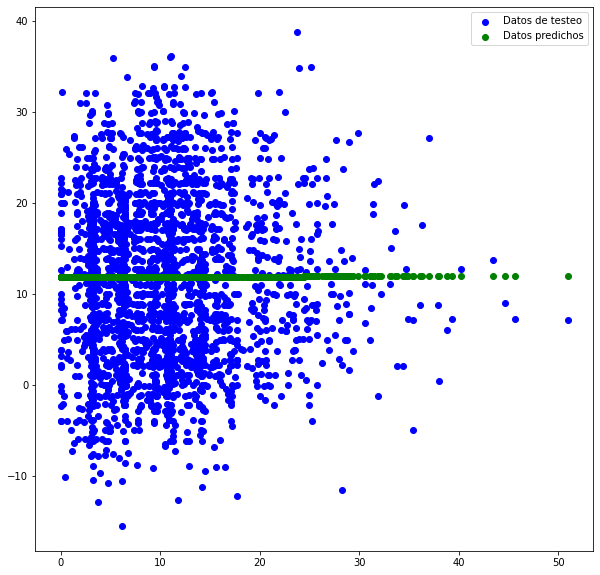

El R cuadrado para este ajuste dio: -0.00038298662012392626
Hola, vamos a analizar la columna rumbo_viento_grados
Para la columna rumbo_viento_grados el coeficiente de regresion lineal dio 0.002960304893382912
La ordenada al origen dio: 11.320403254219109


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


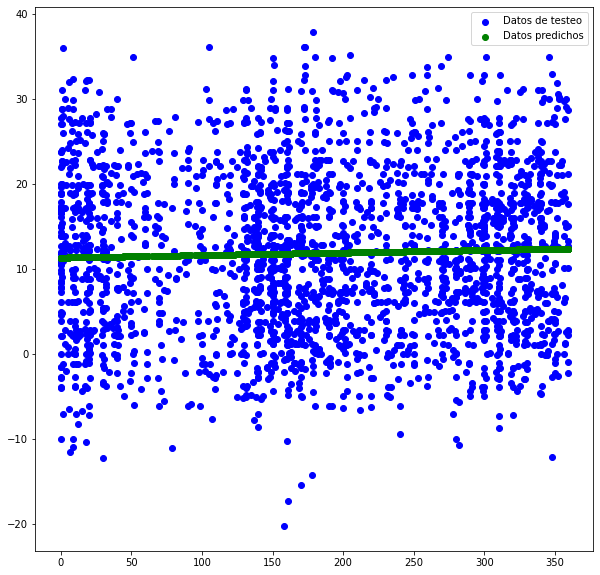

El R cuadrado para este ajuste dio: 0.0004155792431894678
Hola, vamos a analizar la columna visibilidad_km
Para la columna visibilidad_km el coeficiente de regresion lineal dio 0.8791845926591726
La ordenada al origen dio: 2.658395775091712


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


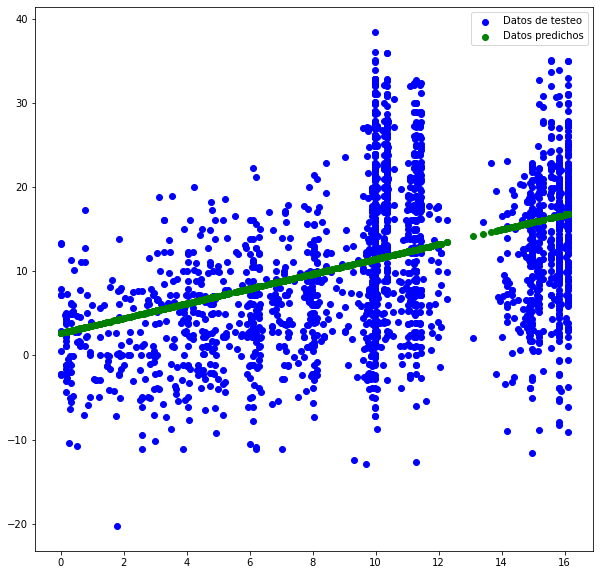

El R cuadrado para este ajuste dio: 0.15548612838557763
Hola, vamos a analizar la columna presion_mbar
Para la columna presion_mbar el coeficiente de regresion lineal dio -0.38545763964007235
La ordenada al origen dio: 403.8040768719209


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


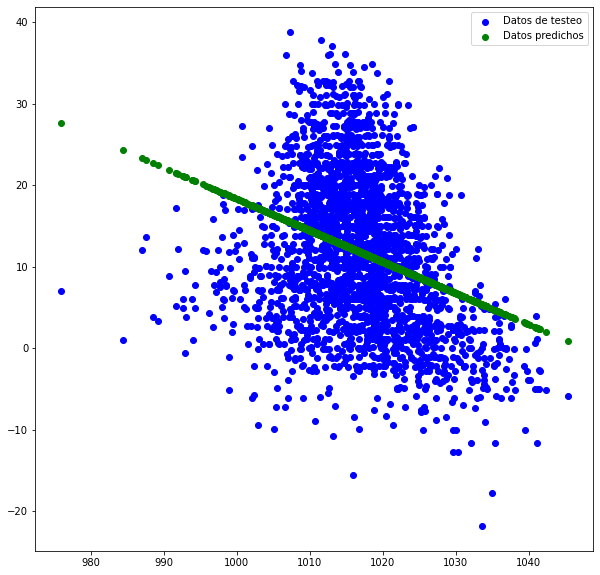

El R cuadrado para este ajuste dio: 0.08275411556661849
Hola, vamos a analizar la columna lluvia_binarizada
Para la columna lluvia_binarizada el coeficiente de regresion lineal dio 16.969333089586463
La ordenada al origen dio: -3.26622871046229


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


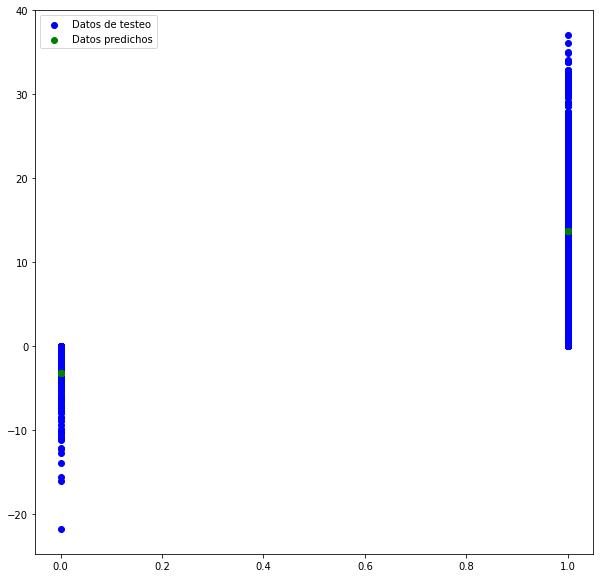

El R cuadrado para este ajuste dio: 0.30914454428490135
Hola, vamos a analizar la columna Cold
Para la columna Cold el coeficiente de regresion lineal dio -15.918993619410129
La ordenada al origen dio: 15.895916696333213


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


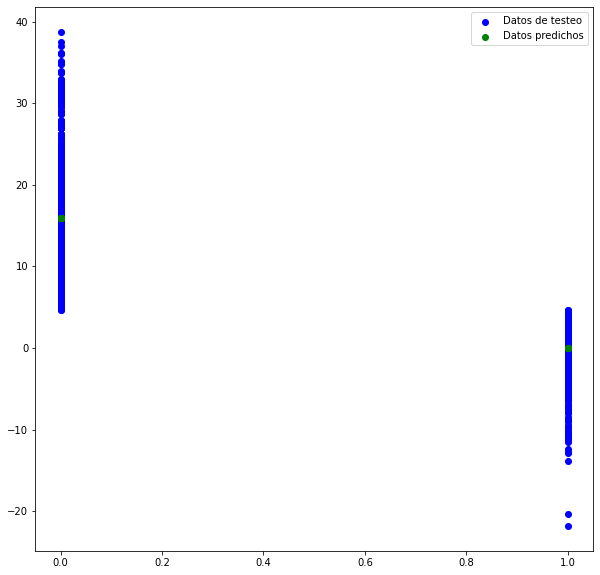

El R cuadrado para este ajuste dio: 0.5234578220001238
Hola, vamos a analizar la columna Normal
Para la columna Normal el coeficiente de regresion lineal dio -0.5500917239268298
La ordenada al origen dio: 12.156669335468374


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


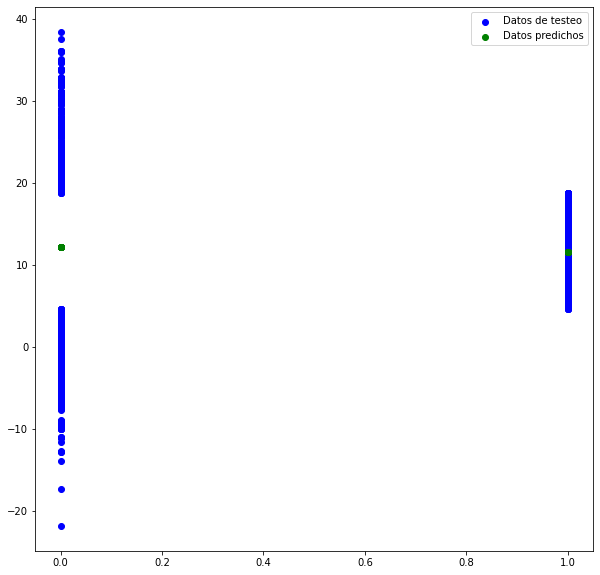

El R cuadrado para este ajuste dio: 0.00010900007998104755
Hola, vamos a analizar la columna Warm
Para la columna Warm el coeficiente de regresion lineal dio 16.562014622153836
La ordenada al origen dio: 7.6868142066749945


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


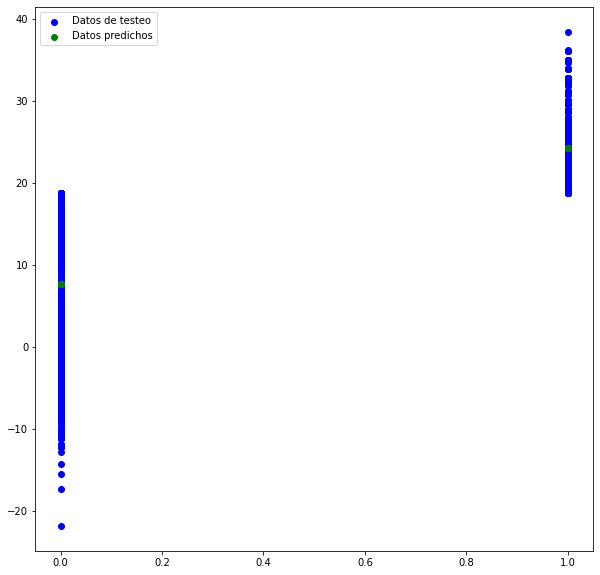

El R cuadrado para este ajuste dio: 0.562204919032607
Hola, vamos a analizar la columna descripcion_n
Para la columna descripcion_n el coeficiente de regresion lineal dio 12.235365711385933
La ordenada al origen dio: -0.38309145923402


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


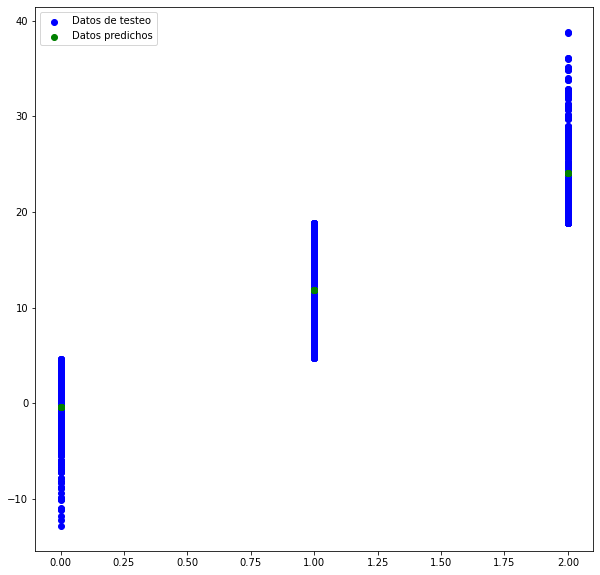

El R cuadrado para este ajuste dio: 0.8214175077881648


In [58]:
for columna in X.columns:
  regresion(X,y,columna)

In [64]:
# Vamos a hacer ahora una regresion multiple
x_train, x_test, y_train, y_test = train_test_split(X_limpia,y)
modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)
print (modelo.coef_)
print (X_limpia.columns)
y_pred = modelo.predict(x_test)
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

[-9.77674632e+00 -1.15664494e-01  6.43261491e-04  4.73597180e-02
 -9.62889672e-02  4.62411990e+00  9.25231946e+00]
Index(['humedad', 'velocidad_viento_kmh', 'rumbo_viento_grados',
       'visibilidad_km', 'presion_mbar', 'lluvia_binarizada', 'descripcion_n'],
      dtype='object')
El R cuadrado para este ajuste dio: 0.8722486808258147
